<a href="https://colab.research.google.com/github/PRaghu09/slyr/blob/master/PR_GDAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://pkgs.geos.ed.ac.uk/geos-jammy/pool/world/l/lsdtopotools2/lsdtopotools2_0.9-1geos~22.04.1_amd64.deb  &> /dev/null
!apt install ./lsdtopotools2_0.9-1geos~22.04.1_amd64.deb  &> /dev/null

In [2]:
!lsdtt-basic-metrics -v

|| Welcome to the LSDTopoTools basic metrics tool!     ||
|| This program has a number of options for calculating||
|| simple landscape metrics.                           ||
|| This program was developed by Simon M. Mudd         ||
||  at the University of Edinburgh                     ||
|| If you use these routines please cite:              ||
|| http://doi.org/10.5281/zenodo.4577879               ||
|| If you use the roughness routine please cite:       ||
|| https://www.doi.org/10.5194/esurf-3-483-2015        ||
|| Documentation can be found at:                      ||
|| https://lsdtopotools.github.io/LSDTT_documentation/ ||
|| This is LSDTopoTools2 version                       ||
|| 0.9
|| If the version number has a d at the end it is a    ||
||  development version.                               ||
|| You have called an LSDTopoTools program.            ||
|| Prepare to explore topographic data!                ||
|| You can find some examples of usage here:           ||
|| http

In [3]:
!pip install lsdviztools  &> /dev/null

In [5]:
!pip install lsdviztools --upgrade

In [6]:
import lsdviztools
lsdviztools.__version__

'0.4.14'

In [7]:
import lsdviztools.lsdbasemaptools as bmt
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

In [9]:
lower_left = [13.857955734415885, 78.18169190142179]
upper_right = [16.769445310402514, 80.18542213222645]

In [14]:
# YOU NEED TO PUT YOUR API KEY IN A FILE
your_OT_api_key_file = "/PR_OT_api_key.txt"

with open(your_OT_api_key_file, 'r') as file:
    print("I am reading you OT API key from the file "+your_OT_api_key_file)
    api_key = file.read().rstrip()
    print("Your api key starts with: "+api_key[0:4])

Dataset_prefix = "PR_Cuddapah"
source_name = "COP30"


PR_C_DEM = bmt.ot_scraper(source = source_name,
                        lower_left_coordinates = lower_left,
                        upper_right_coordinates = upper_right,
                        prefix = Dataset_prefix,
                        api_key_file = your_OT_api_key_file)
PR_C_DEM.print_parameters()
PR_C_DEM.download_pythonic()

I am reading you OT API key from the file /PR_OT_api_key.txt
Your api key starts with: bbbb
I am taking your coordinates from the lower left list
I am taking your coordinates from the upper right list
I am reading you OT API key from the file /PR_OT_api_key.txt
The grid spacing for your DEM will be:30
The source is: COP30
The west longitude is: 78.18169190142179
The east longitude is: 80.18542213222645
The south latitude is: 16.769445310402514
The north latitude is: 13.857955734415885
The path is: ./
The prefix is: PR_Cuddapah
The grid spacing is: 30
I am going to download a file from opentopography (I've removed the API key):
https://portal.opentopography.org/API/globaldem?demtype=COP30&south=13.857955734415885&north=16.769445310402514&west=78.18169190142179&east=80.18542213222645&outputFormat=GTiff
This might take a little while, depending on the size of the file. 
The filename will be:
./PR_Cuddapah_COP30.tif
The path and file without path are:
./  PR_Cuddapah_COP30.tif
Finished dow

('./PR_Cuddapah_COP30.tif', './', 'PR_Cuddapah_COP30.tif')

In [15]:
!ls

drive					   lsdtt_version.txt	  sample_data
lsdtopotools2_0.9-1geos~22.04.1_amd64.deb  PR_Cuddapah_COP30.tif
lsdtt-basic-metrics-version.txt		   rio_aguas_COP30.tif


In [21]:
!gdalinfo PR_Cuddapah_COP30.tif

Driver: GTiff/GeoTIFF
Files: PR_Cuddapah_COP30.tif
Size is 7213, 10481
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
 

In [28]:
filename = "PR_Cuddapah_COP30.tif"
with rio.open(filename) as src:
    print("Raster crs is:")
    print(src.crs)
    print("\nRaster bounding box is:")
    print(src.bounds)
    print("\nRaster pixel sizes in the X,Y directions are:")
    print(src.res)

Raster crs is:
EPSG:4326

Raster bounding box is:
BoundingBox(left=78.18152776666668, bottom=13.858194455555553, right=80.18513887777779, top=16.76958334444444)

Raster pixel sizes in the X,Y directions are:
(0.0002777777777777778, 0.0002777777777777778)


In [29]:
filename = "PR_Cuddapah_COP30.tif"
with rio.open(filename) as src:
    print(src.meta)


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 7213, 'height': 10481, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.0002777777777777778, 0.0, 78.18152776666668,
       0.0, -0.0002777777777777778, 16.76958334444444)}


In [30]:
%%capture
if 'google.colab' in str(get_ipython()):
  !apt-get install gdal-bin
  !pip install leafmap[raster]

In [31]:
!gdalinfo --version

GDAL 3.6.4, released 2023/04/17


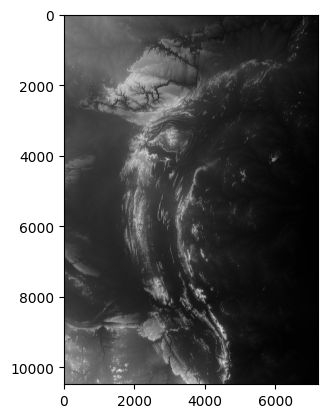

In [40]:
%matplotlib inline
filename = "PR_Cuddapah_COP30.tif"
with rio.open(filename) as src:
    plt.imshow(src.read(1), cmap='grey')
    plt.show()

In [37]:
!gdaldem hillshade PR_Cuddapah_COP30.tif PR_Cuddapah_COP30_HS.tif -alg ZevenbergenThorne

0...10...20...30...40...50...60...70...80...90...100 - done.


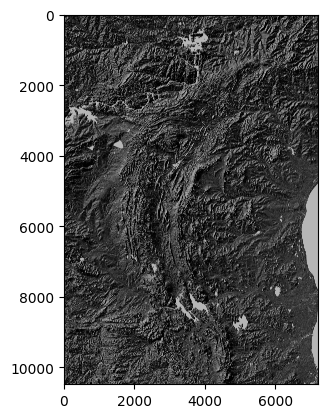

In [41]:
%matplotlib inline
filename = "PR_Cuddapah_COP30_HS.tif"
with rio.open(filename) as src:
    plt.imshow(src.read(1), cmap='grey')
    plt.show()

In [44]:
!gdalwarp -t_srs EPSG:3034 PR_Cuddapah_COP30.tif PR_Cuddapah_COP30_LCC.tif

Creating output file that is 12710P x 11963L.
Processing PR_Cuddapah_COP30.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [45]:
!gdalinfo PR_Cuddapah_COP30.tif


Driver: GTiff/GeoTIFF
Files: PR_Cuddapah_COP30.tif
Size is 7213, 10481
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
 

In [52]:
!gdalwarp -vshift PR_Cuddapah_COP30.tif PR_Cuddapah_COP30_GCC.tif

Creating output file that is 7213P x 10481L.
Processing PR_Cuddapah_COP30.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


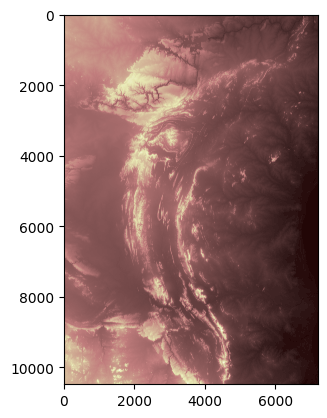

In [54]:
%matplotlib inline
filename = "PR_Cuddapah_COP30_GCC.tif"
with rio.open(filename) as src:
    plt.imshow(src.read(1), cmap='pink')
    plt.show()

In [66]:
!gdaldem hillshade PR_Cuddapah_COP30_GCC.tif PR_Cuddapah_COP30_GCC_hillshade.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


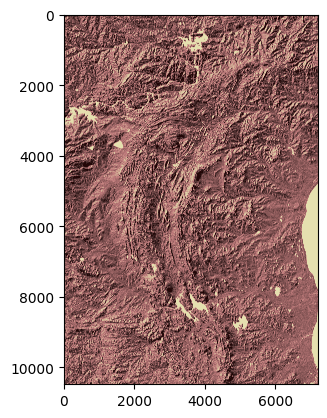

In [70]:
%matplotlib inline
filename = "PR_Cuddapah_COP30_GCC_hillshade.tif"
with rio.open(filename) as src:
    plt.imshow(src.read(1), cmap='pink')
    plt.show()